# Kaggle Competiton
- https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/overview
- Note : [Link](https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4https://www.notion.so/parkjaeyoung/Kaggle-4147f4c9dd0b43e284d697c1cb6d7875?pvs=4)

# Library 및 Data Load

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

In [86]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

print('train data dim : {}'.format(df_train.shape))
print('sub data dim : {}'.format(df_test.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [3]:
display(df_train.head())
display(df_test.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
'''
target = df_train['price']
del df_train['price']

train_len = len(df_train)
test_id = df[id][train_len:]
'''

"\ntarget = df_train['price']\ndel df_train['price']\n\ntrain_len = len(df_train)\ntest_id = df[id][train_len:]\n"

-------

#  EDA
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

## 결측치 확인

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

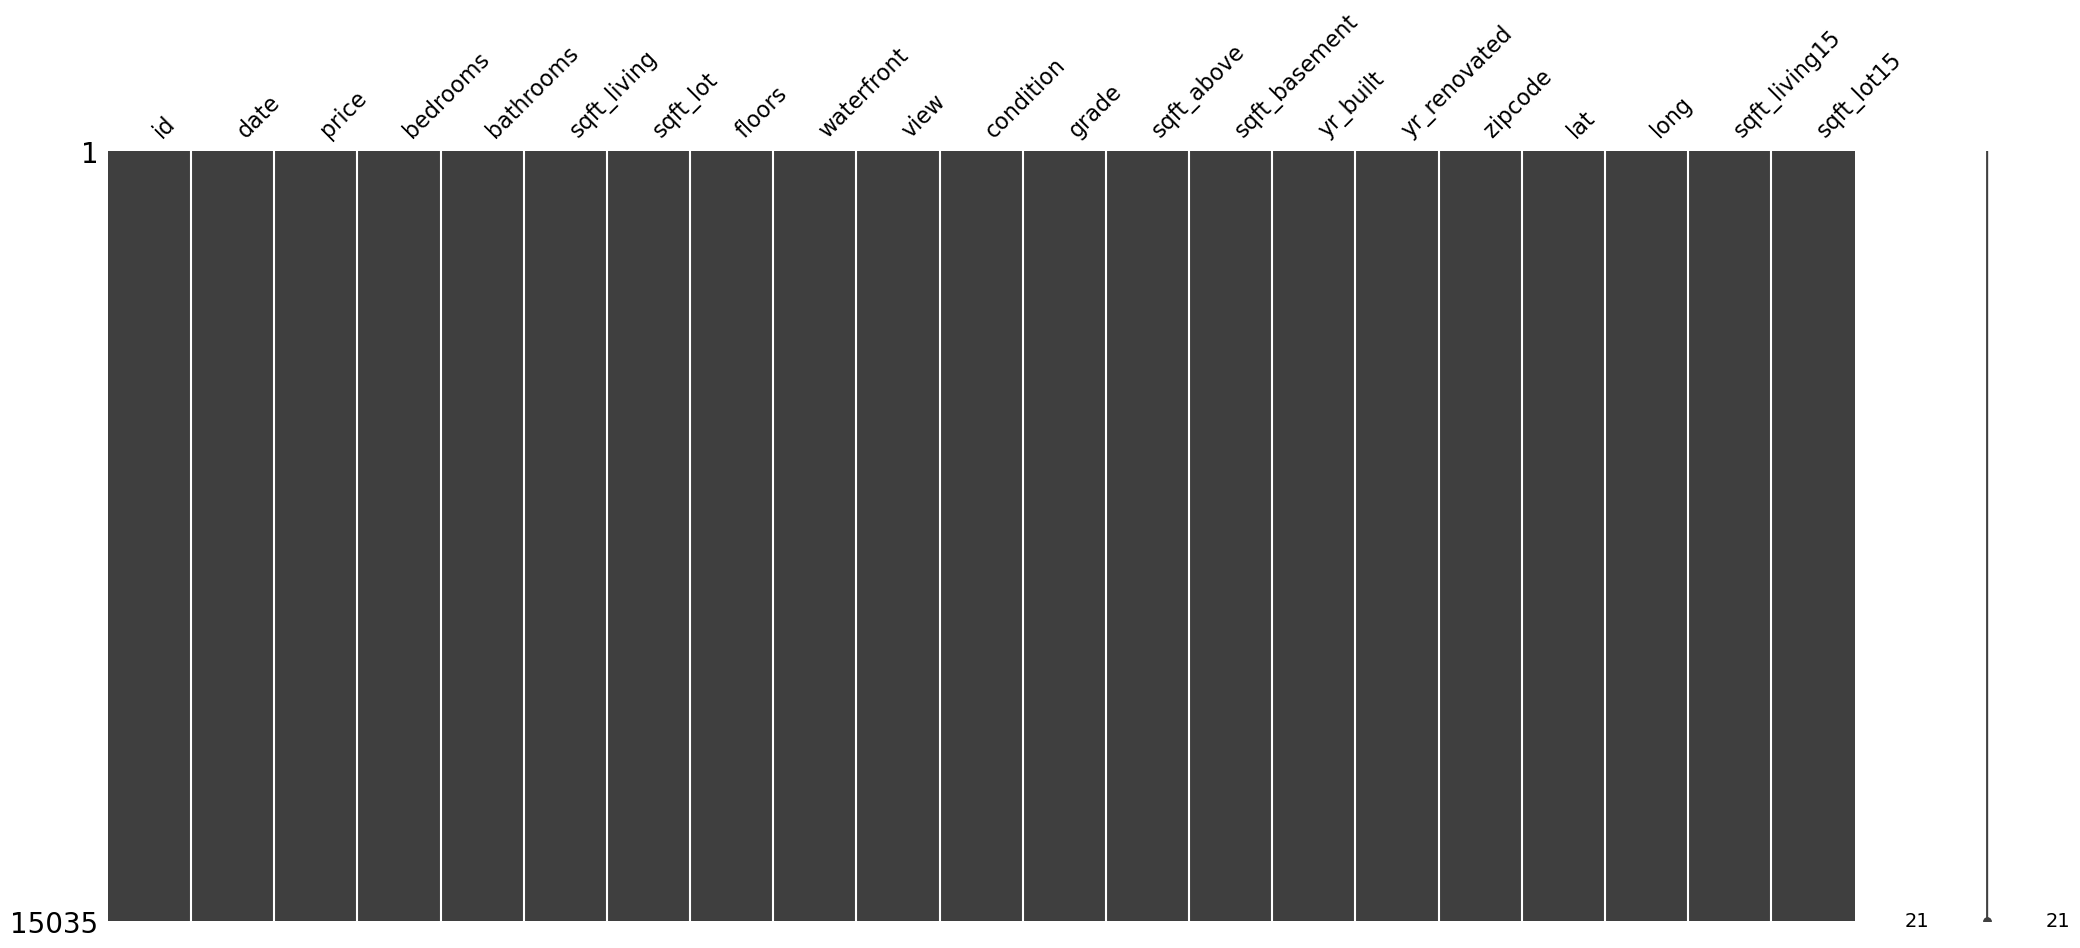

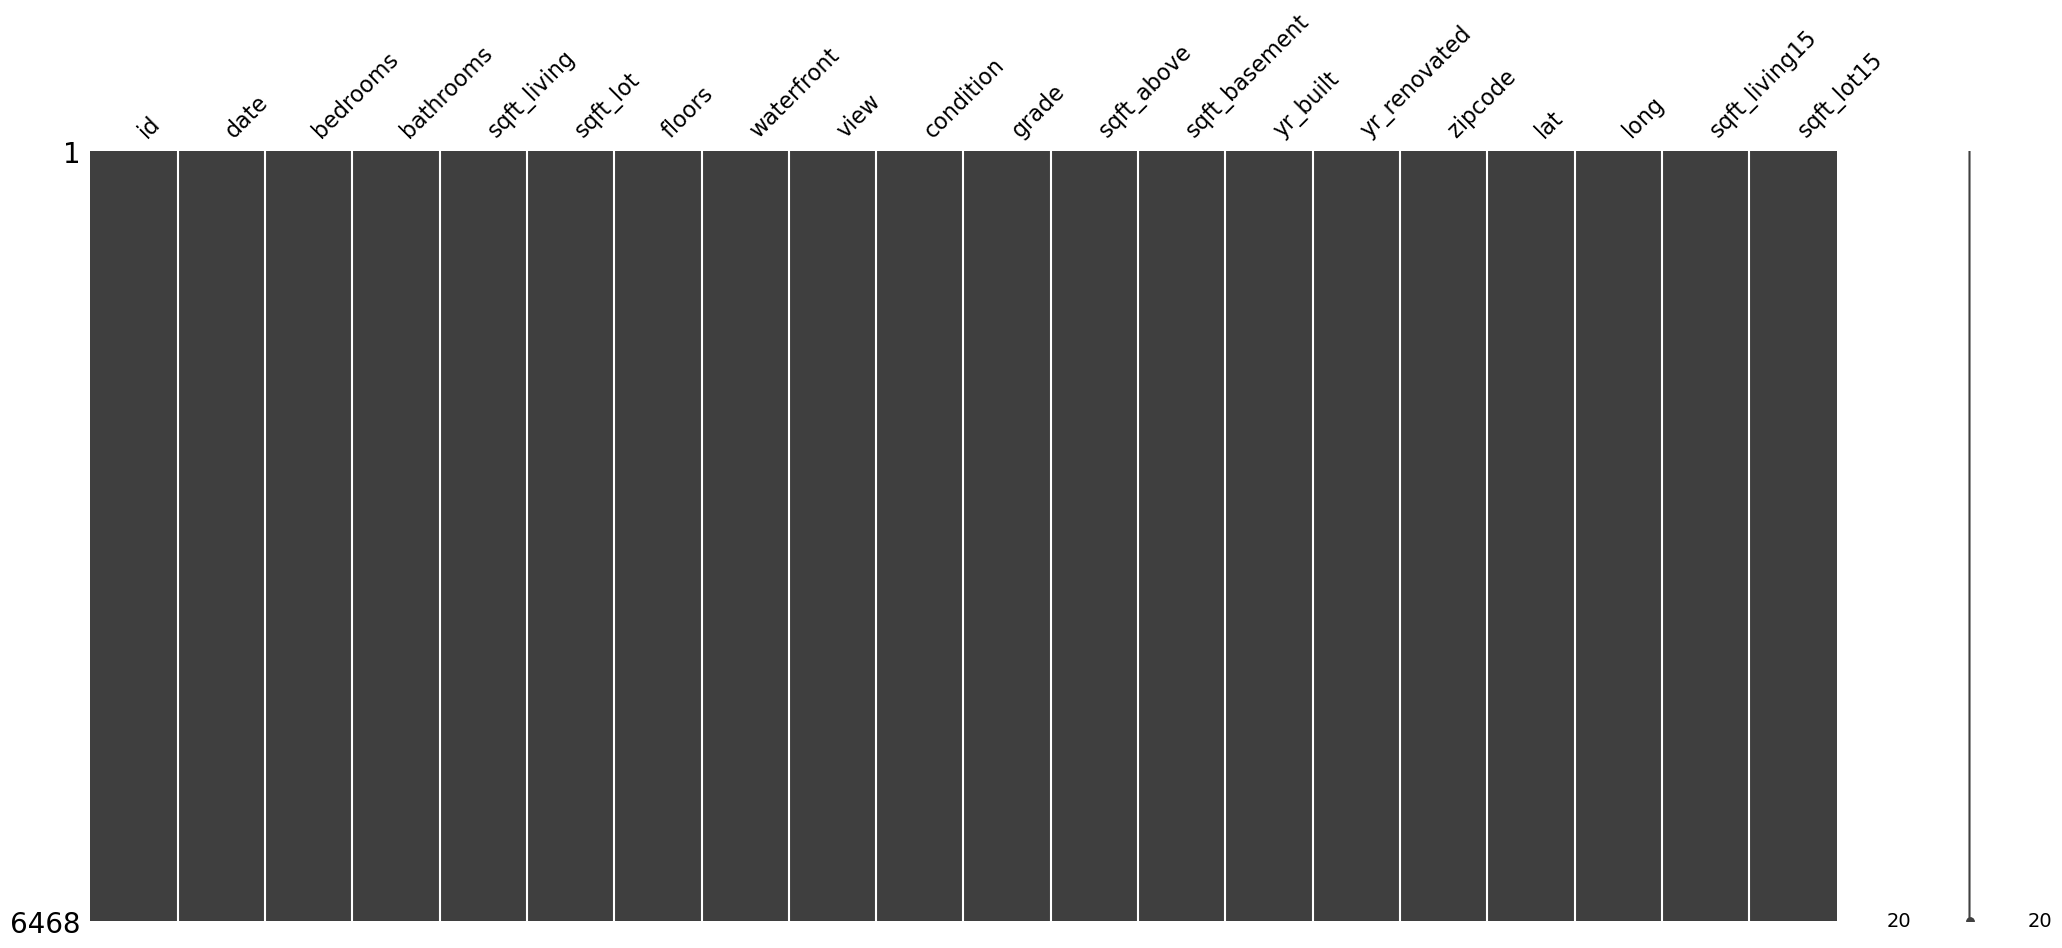

In [5]:
for df in [df_train,df_test]:
    display(df.isnull().sum())
    msno.matrix(df)

-----------

## EDA 1 - Correlation
 - 어떤 데이터가 Price 와 상관 관계가 높을까?

In [73]:
df = df_train.copy()

In [74]:
## To_Library
def date_to_y(x):
    str_ym = x[:6]
    y = str_ym[:4]
    return int(y)

def date_to_m(x):
    str_ym = x[:6]
    m = str_ym[4:]
    return int(m)

In [75]:
df['year'] = df['date'].apply(date_to_y)
df['month'] = df['date'].apply(date_to_m)

In [76]:
df.drop('date',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15035 non-null  float64
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [79]:
# continuous + sequential variables --> spearman
# 정규화 과정 뒤 pearson 재 탐색 필요
correlation = abs(df.corr(method='spearman')) 

<Axes: >

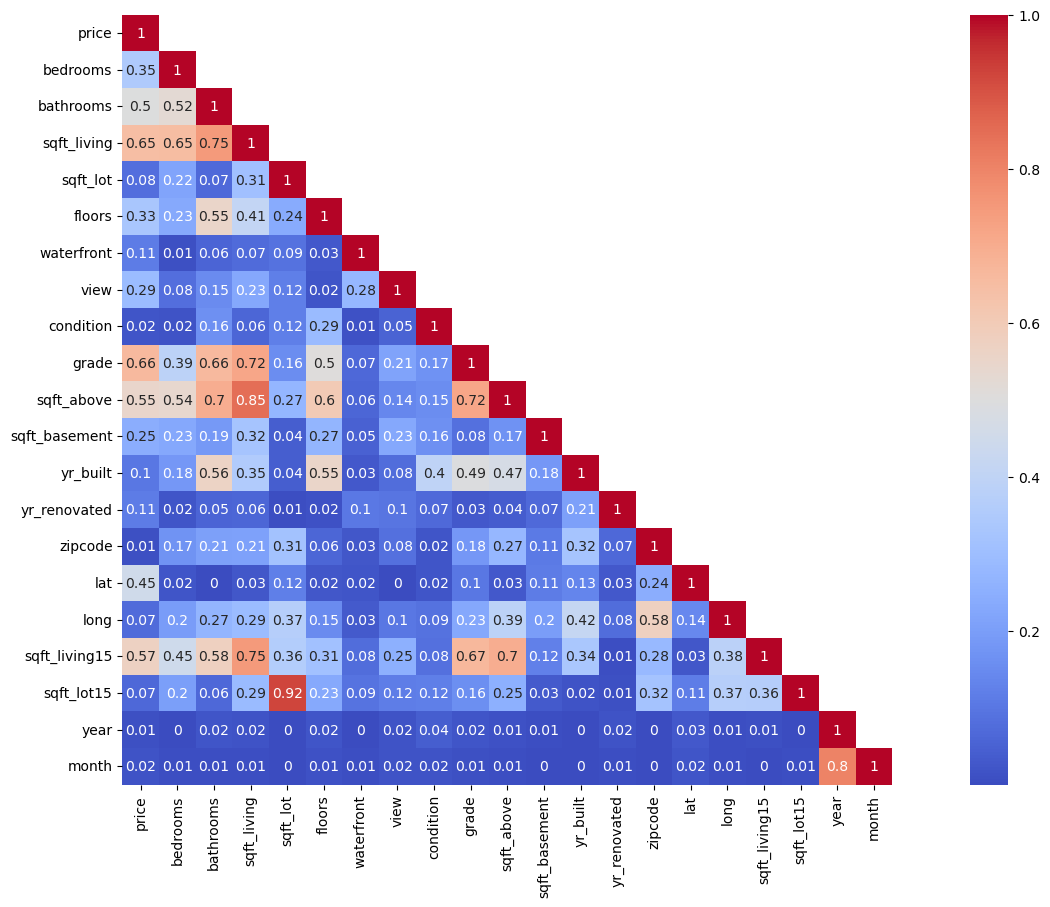

In [80]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(correlation,square=True,annot=np.round(correlation,2),mask=mask,cmap='coolwarm')

In [81]:
correlation.index.name = 'category'
correlation.T.index.name = 'relevant_category'

corr_df = pd.DataFrame(correlation.stack(),columns=['correaltion']).reset_index()
corr_df = corr_df.loc[corr_df['category'] != corr_df['relevant_category']]
corr_df['rank'] = corr_df.groupby('category')['correaltion'].rank('min',ascending=False).astype(int)
corr_df.sort_values('correaltion',ascending=False)

,category,relevant_category,correaltion,rank
102,sqft_lot,sqft_lot15,0.922681,1
382,sqft_lot15,sqft_lot,0.922681,1
213,sqft_above,sqft_living,0.846081,1
73,sqft_living,sqft_above,0.846081,1
439,month,year,0.801770,1
...,...,...,...,...
57,bathrooms,lat,0.000765,20
417,year,sqft_lot15,0.000680,20
397,sqft_lot15,year,0.000680,20
434,month,zipcode,0.000164,20


### [Price - features] correlation rank
 - 가격 연관성이 높게 항목
     - sqft_living(주거공간 크기) -> grad(집등급) -> sqft_above(지하실 제외 평방 미트) -> sqft_living15(2015 년 기준 집 크기) -> view (집 전망)-> bedroom (방 수) -> lat(위도)
 - 지어진 년도, 재건축 이슈와는 우선 크게 상관 관계가 없음 => 전처리 및 재조합 고민 필요
 - 위치 관련 피쳐는 전처리 필요해보임

In [65]:
corr_df[corr_df['category']=='price'].sort_values('rank')

,category,relevant_category,correaltion,rank
32,price,grade,0.662125,1
26,price,sqft_living,0.646482,2
40,price,sqft_living15,0.573777,3
33,price,sqft_above,0.547868,4
25,price,bathrooms,0.498989,5
38,price,lat,0.450692,6
24,price,bedrooms,0.350185,7
28,price,floors,0.328674,8
30,price,view,0.291720,9
34,price,sqft_basement,0.245304,10


### 주요 피처와 타 피처 간 연관도 (sqft_living) 
 - sqft_above -> bathrooms -> sqft_living15 -> grade -> bedrooms ...
 - 면적 관련 피처들과..당연.
 - Grade, Price
 - 그외 지어진 년도, 위도 와 상관 관계 의심

In [68]:
corr_df[corr_df['category']=='sqft_living'].sort_values('rank')

,category,relevant_category,correaltion,rank
99,sqft_living,sqft_above,0.846081,1
91,sqft_living,bathrooms,0.748612,2
106,sqft_living,sqft_living15,0.748214,3
98,sqft_living,grade,0.717800,4
90,sqft_living,bedrooms,0.649001,5
89,sqft_living,price,0.646482,6
94,sqft_living,floors,0.408417,7
101,sqft_living,yr_built,0.352702,8
100,sqft_living,sqft_basement,0.322338,9
93,sqft_living,sqft_lot,0.307893,10


### 주요 피처와 타 피처 간 연관도 (grade) 
- sqft_living -> sqft_above	 -> sqft_living15 -> price -> bathrooms ...
- 연관도가 높게 나온 항목 
    - 집 면적 관련 피처들(sqft_living,sqft_above,sqft_living15,bathrooms,floors)
    - 지어진 년도 (yr_build)
    - 위치(long)
    - 전망
- 재건축 관련은 의미가 없어보임

In [69]:
corr_df[corr_df['category']=='grade'].sort_values('rank')

,category,relevant_category,correaltion,rank
224,grade,sqft_living,0.717800,1
231,grade,sqft_above,0.715100,2
238,grade,sqft_living15,0.665039,3
221,grade,price,0.662125,4
223,grade,bathrooms,0.661112,5
226,grade,floors,0.504506,6
233,grade,yr_built,0.494338,7
222,grade,bedrooms,0.386833,8
237,grade,long,0.227766,9
228,grade,view,0.211469,10


In [82]:
del df

In [ ]:
target = df_train['price']
del df_train['price']

train_len = len(df_train)
test_id = df_test[id][train_len:]

## EDA2 -Visualization : Plot(COUNT,BOX,KDE)

In [84]:
df_train.drop('price',axis=1,inplace=True)

In [85]:
display(df_train.shape,df_test.shape)

(15035, 20)

(6468, 20)

- Date 분리 

In [ ]:
df['year'] = df['date'].apply(lambda x:x[:4]).astype(int)
df['month'] = df['date'].apply(lambda x:x[4:6]).astype(int)
df['day'] = df['date'].apply(lambda x:x[6:8]).astype(int)

In [ ]:
count_col = ['year','month', 'condition', 'grade',
                  'sqft_living','bathrooms', 'bedrooms','view']

### COUNT PLOT

In [ ]:
nrows ,ncols = 4 , 2
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(f_selected_col):
            break
        sns.countplot(data=df,x=f_selected_col[idx],ax=ax[r,c])
        idx += 1

### BOX Plot

In [ ]:
nrows ,ncols = 4 , 2
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(f_selected_col):
            break
        sns.boxplot(data=df,x=f_selected_col[idx],y='price',ax=ax[r,c])
        idx += 1

### KDE Plot

In [ ]:
nrows ,ncols = 4 , 2
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(f_selected_col):
            break
        sns.kdeplot(data=df,x=f_selected_col[idx],y='price',ax=ax[r,c])
        idx += 1

### KDE Plot2

In [ ]:
nrows ,ncols = 4 , 2
idx = 0
fig, ax = plt.subplots(nrows,ncols,figsize=(ncols*7,nrows*5))
for r in range(nrows):
    for c in range(ncols):
        if idx == len(f_selected_col):
            break
        sns.kdeplot(data=df[f_selected_col[idx]],ax=ax[r,c])
        idx += 1

# 데이터 전처리(PreProcessing)

In [ ]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

print('train data dim : {}'.format(df.shape))
print('sub data dim : {}'.format(df_test.shape))

In [ ]:
## 날짜 처리

##  Label Encoding & Feature Selection 

- Price 는 corr() 결과   
        sqft_living(주거공간 크기) -> grad(집등급) -> sqft_above(지하실 제외 평방 미트) -> sqft_living15(2015 년 기준 집 크기) -> view (집 전망)-> bedroom (방 수) -> lat(위도) 순으로 연관도가 깊고, 
- sqft_living(주거공간 크기) 는 corr 결과  
        sqft_above -> bathrooms -> sqft_living15 -> grade -> bedrooms ...연관도가 깊게 나오므로, 

- 집 면적 관련 피쳐들을 단순화 : 주거공간 크기, 평당 가격(ZIPCode 별) , Bedroom 이 외 모든 피처 제거


### Label Encoding 

In [ ]:
#평당 가격 (Kaggle 레퍼런스 노트 참조)
le = LabelEncoder()
le.fit(df_train['zipcode'])
le.fit(df_test['zipcode'])

df_train['zipcode'] = le.transform(df_train['zipcode'])
df_test['zipcode'] = le.transform(df_test['zipcode'])

In [ ]:
df_train['price_per_land_area'] = df_train['price'] / (df_train['sqft_living'])
price_per_ft = df_train.groupby(['zipcode'])['price_per_land_area'].agg({'mean', 'std', 'count'}).reset_index()

df_train = pd.merge(df_train, price_per_ft, how='left', on='zipcode')
df_test = pd.merge(df_test, price_per_ft, how='left', on='zipcode')


del df_train['price_per_land_area']

### Feature Selection

In [ ]:
X_train = df_train.drop(['id', 'price'], axis=1)
y_train = df_train['price']
y_train = np.log1p(y_train)
X_test  = df_test.drop(['id'], axis=1)

In [ ]:
for df in [X_train, X_test]:
    df['date(new)'] = df['date'].apply(lambda x: int(x[4:8])+800 if x[:4] == '2015' else int(x[4:8])-400)
    df['how_old'] = df['date'].apply(lambda x: x[:4]).astype(int) - df[['yr_built', 'yr_renovated']].max(axis=1)
    del df['date']
    del df['yr_renovated']
    del df['yr_built'] 
    del df['floors'] 
    del df['sqft_lot']
    del df['sqft_lot15']
    del df['waterfront']
    del df['sqft_above']
    del df['sqft_basement']
    del df['condition']
    del df['sqft_living15']

## Log Scaling

In [ ]:
len(X_train.columns)

In [ ]:
rows = (X_train.shape[1]+3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(14, rows*5))
cols = X_train.columns

for r in range(rows):
    for c in range(4):
        index = 4 * r + c
        if index == len(cols):
            break
        reg = stats.probplot(X_train[cols[index]], plot=axes[r, c])
        axes[r, c].set_title(cols[index], fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Log Scaling
log_features = ['bedrooms', 'bathrooms', 'how_old', 'sqft_living', 'mean']
for feature in log_features:
    for df in [X_train, X_test]:
        df[feature] = np.log1p(df[feature])

In [ ]:
rows = (X_train.shape[1]+3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(14, rows*5))
cols = X_train.columns

for r in range(rows):
    for c in range(4):
        index = 4 * r + c
        if index == len(cols):
            break
        reg = stats.probplot(X_train[cols[index]], plot=axes[r, c])
        axes[r, c].set_title(cols[index], fontsize=20)
plt.tight_layout()
plt.show()

## Outlier 탐색 및 제거

In [ ]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(method='bfill')

# 데이터 모델링 

In [ ]:
def custom_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model,
                         param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,
                         verbose=verbose,
                         n_jobs=n_jobs)
    # 모델 fitting
    grid_model.fit(train, y)
    
    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

## XGboost

In [ ]:
'''param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}'''

In [ ]:
# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 2, 4, 6],
    'learning_rate': [0.005, 0.01, 0.015]
}

In [ ]:
# XGBoost 모델 객체 생성
model = XGBRegressor(random_state=36)

# GridSearchCV 객체 생성
custom_GridSearch(model, X_train, y_train, param_grid, verbose=2, n_jobs=5)


In [ ]:
# 최적 파라미터 출력
print(grid_search.best_params_)

In [ ]:
from xgboost import XGBRegressor

# 최적의 파라미터 값을 사용하여 XGBoost 모델 객체 생성
xgb = XGBRegressor(learning_rate=0.05, max_depth=6, n_estimators=300)

# 모델 학습
xgb.fit(X_train, y_train)

# 예측
predictions = xgb.predict(X_test)

In [ ]:
predictions

## LGBMRegressor

In [ ]:
param_grid = {
    'max_depth': [1, 3, 5, 7, 9],  # 1,2,3(데이터 엄청 작을 때만 사용)  3 5 7 9
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'n_estimators': [50, 70, 90, 100],  # 1000 ~ 5000 예시 케이스 검색.. 일반적인 케이스 정리해보기..
    'num_leaves': [40, 50, 60]
}

In [ ]:
model = LGBMRegressor(random_state=36)
custom_GridSearch(model, X_train, y_train, param_grid, verbose=2, n_jobs=5)

** RMSLE : 0.174896 **
- Best : 
    - learning_rate : 0.100
    - n_estimators  : 100
    - num_leaves    : 60

In [ ]:
# LGBMRegressor 모델 해당 파라미터로 학습

model = LGBMRegressor(learning_rate=0.05, max_depth=13, n_estimators=700, num_leaves=31, random_state=random_state)
model.fit(train, y)

In [ ]:
#prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

In [ ]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(method='bfill')

In [ ]:

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df_train.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)

In [ ]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}

y_reg = y_train

#prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train)):
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)

### Grid Search

### Model Pipeline

### Average Blending 

### Cross Validation 

# Submission

## 3. 모델링
### Average Blending
여러가지 모델의 결과를 산술 평균을 통해 Blending 모델을 만들겠습니다.

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
교차 검증을 통해 모델의 성능을 간단히 평가하겠습니다.

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                             kf=kfold))

In [ ]:
get_cv_score(models)

### Make Submission

회귀 모델의 경우에는 cross_val_score 함수가 R<sup>2</sup>를 반환합니다.<br>
R<sup>2</sup> 값이 1에 가까울수록 모델이 데이터를 잘 표현함을 나타냅니다. 3개 트리 모델이 상당히 훈련 데이터에 대해 괜찮은 성능을 보여주고 있습니다.<br> 훈련 데이터셋으로 3개 모델을 학습시키고, Average Blending을 통해 제출 결과를 만들겠습니다.

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [ ]:
y_pred = AveragingBlending(models, x, y, sub)

In [ ]:
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})

In [ ]:
sub.to_csv('submission.csv', index=False)